Q. Create Regression model of your choice using suitable dataset.

Regression Models: 
1. Linear Regression 

2. Polynomial Regression Model

3. Logistic Regression Model

4. Random Forest Regressor Model

Perform EDA on the dataset and implement the model and calculate accuracy score, Precision, Recall, F1 score of each linear model

Importing libraries

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor

Load the dataset and displaying head of the dataset.

In [63]:
import pandas as pd
data = pd.read_csv('P:\College\SEM - 7\ML\Lab\earthquakes_2023_global.csv')

print(data.head())

                       time  latitude  longitude   depth   mag magType   nst  \
0  2023-01-01T00:49:25.294Z   52.0999   178.5218  82.770  3.10      ml  14.0   
1  2023-01-01T01:41:43.755Z    7.1397   126.7380  79.194  4.50      mb  32.0   
2  2023-01-01T03:29:31.070Z   19.1631   -66.5251  24.000  3.93      md  23.0   
3  2023-01-01T04:09:32.814Z   -4.7803   102.7675  63.787  4.30      mb  17.0   
4  2023-01-01T04:29:13.793Z   53.3965  -166.9417  10.000  3.00      ml  19.0   

     gap    dmin   rms  ...                   updated  \
0  139.0  0.8700  0.18  ...  2023-03-11T22:51:52.040Z   
1  104.0  1.1520  0.47  ...  2023-03-11T22:51:45.040Z   
2  246.0  0.8479  0.22  ...  2023-03-11T22:51:29.040Z   
3  187.0  0.4570  0.51  ...  2023-03-11T22:51:45.040Z   
4  190.0  0.4000  0.31  ...  2023-03-11T22:51:38.040Z   

                                   place        type horizontalError  \
0  Rat Islands, Aleutian Islands, Alaska  earthquake            8.46   
1        23 km ESE of Manay, Phi

Checking for **Null values.**

In [64]:
print(data.isnull().sum())

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1415
gap                1417
dmin               1866
rms                   0
net                   0
id                    0
updated               0
place              1608
type                  0
horizontalError    1549
depthError            0
magError           1672
magNst             1577
status                0
locationSource        0
magSource             0
dtype: int64


Removing **Null values**

In [65]:
numerical_columns = ['nst', 'gap', 'dmin', 'horizontalError', 'magError', 'magNst']
for column in numerical_columns:
    if data[column].isnull().sum() > 0:
        # Filling with mean
        data[column].fillna(data[column].mean(), inplace=True)

In [66]:
categorical_columns = ['magType', 'place', 'status', 'locationSource', 'magSource']
for column in categorical_columns:
    if data[column].isnull().sum() > 0:
        # Filling with mode
        data[column].fillna(data[column].mode()[0], inplace=True)

After removing Null values checking again if there are any **Null values**

In [67]:
print(data.isnull().sum())

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64


The 'data.describe()' function provides key statistics for numerical columns: count, mean, standard deviation, min, max, and percentiles (25%, 50%, 75%), summarizing the distribution and spread of values.

In [68]:
data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,26642.000000,26642.000000,26642.000000,26642.000000,26642.000000,26642.000000,26642.000000,26642.000000,26642.000000,26642.000000,26642.000000,26642.000000
mean,16.852798,-11.487497,67.491224,4.007395,42.571332,124.930971,2.692908,0.581575,7.017267,4.475056,0.122735,33.315939
std,30.389200,130.053399,116.762456,0.794423,36.648514,65.612383,3.899387,0.256276,3.952201,4.451649,0.099010,46.579551
min,-65.849700,-179.998700,-3.370000,2.600000,0.000000,8.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,-6.415275,-149.608650,10.000000,3.220000,19.000000,75.000000,0.666475,0.410000,4.350000,1.848000,0.082000,11.000000
50%,18.884167,-64.811833,21.998000,4.300000,32.000000,116.000000,1.760000,0.590000,7.017267,2.019000,0.115000,19.000000
75%,41.827950,126.965100,66.833000,4.500000,50.000000,160.000000,3.020750,0.750000,9.550000,6.669000,0.148000,34.000000
max,86.593900,179.999400,681.238000,7.800000,423.000000,350.000000,50.820000,1.880000,99.000000,60.670000,4.490000,884.000000


Checking type of the every column of the dataset.

In [69]:
# Check data types
print(data.dtypes)

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object


Convert datetime column to datetime type and extract useful features from datetime

In [70]:
data['time'] = pd.to_datetime(data['time'])

data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day
data['hour'] = data['time'].dt.hour
data['minute'] = data['time'].dt.minute
data['second'] = data['time'].dt.second

Dropping the time column

In [71]:
data = data.drop(columns=['time'])
print(data.dtypes)

latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
year                 int32
month                int32
day                  int32
hour                 int32
minute               int32
second               int32
dtype: object


Convert categorical columns to numeric using one-hot encoding.  

Display the first few rows of the encoded dataset.

In [72]:
data_encoded = pd.get_dummies(data, columns=['magType', 'type', 'status', 'locationSource', 'magSource'])

print(data_encoded.head())

   latitude  longitude   depth   mag   nst    gap    dmin   rms net  \
0   52.0999   178.5218  82.770  3.10  14.0  139.0  0.8700  0.18  us   
1    7.1397   126.7380  79.194  4.50  32.0  104.0  1.1520  0.47  us   
2   19.1631   -66.5251  24.000  3.93  23.0  246.0  0.8479  0.22  pr   
3   -4.7803   102.7675  63.787  4.30  17.0  187.0  0.4570  0.51  us   
4   53.3965  -166.9417  10.000  3.00  19.0  190.0  0.4000  0.31  us   

             id  ... magSource_ok magSource_pgc  magSource_pr  magSource_se  \
0    us7000j5a1  ...        False         False         False         False   
1    us7000j3xk  ...        False         False         False         False   
2  pr2023001000  ...        False         False          True         False   
3    us7000j3xm  ...        False         False         False         False   
4    us7000j1zd  ...        False         False         False         False   

   magSource_slm  magSource_tx  magSource_us  magSource_uu  magSource_uw  \
0          False      

Selecting features and target variable.  
Example: Using latitude, longitude, depth, and magnitude as features  

In [73]:
X = data_encoded[['latitude', 'longitude', 'depth', 'mag', 'year', 'month', 'day', 'hour', 'minute', 'second']]

# Target variable
y = data_encoded['mag']  

print(X.head())
print(y.head())


   latitude  longitude   depth   mag  year  month  day  hour  minute  second
0   52.0999   178.5218  82.770  3.10  2023      1    1     0      49      25
1    7.1397   126.7380  79.194  4.50  2023      1    1     1      41      43
2   19.1631   -66.5251  24.000  3.93  2023      1    1     3      29      31
3   -4.7803   102.7675  63.787  4.30  2023      1    1     4       9      32
4   53.3965  -166.9417  10.000  3.00  2023      1    1     4      29      13
0    3.10
1    4.50
2    3.93
3    4.30
4    3.00
Name: mag, dtype: float64


Feature scaling.

In [74]:

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Check the scaled features
print(pd.DataFrame(X_scaled, columns=X.columns).head())


   latitude  longitude     depth       mag  year     month       day  \
0  1.159878   1.461037  0.130856 -1.142229   0.0 -1.556165 -1.593573   
1 -0.319629   1.062856  0.100229  0.620091   0.0 -1.556165 -1.593573   
2  0.076025  -0.423200 -0.372483 -0.097425   0.0 -1.556165 -1.593573   
3 -0.711881   0.878540 -0.031725  0.368331   0.0 -1.556165 -1.593573   
4  1.202545  -1.195333 -0.492387 -1.268109   0.0 -1.556165 -1.593573   

       hour    minute    second  
0 -1.634463  1.126834 -0.257309  
1 -1.491919  0.667094  0.782648  
2 -1.206831 -0.022515  0.089343  
3 -1.064287 -1.171864  0.147119  
4 -1.064287 -0.022515 -0.950614  


Train-Test Split.

In [75]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (21313, 10)
Test set shape: (5329, 10)


### Linear Regression 

In [76]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Evaluation:")
print(f"Mean Squared Error: {mse_lr:.4f}")
print(f"Root Mean Squared Error: {rmse_lr:.4f}")
print(f"Mean Absolute Error: {mae_lr:.4f}")
print(f"R^2 Score: {r2_lr:.4f}")


Linear Regression Evaluation:
Mean Squared Error: 0.0000
Root Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
R^2 Score: 1.0000


Linear regression plots

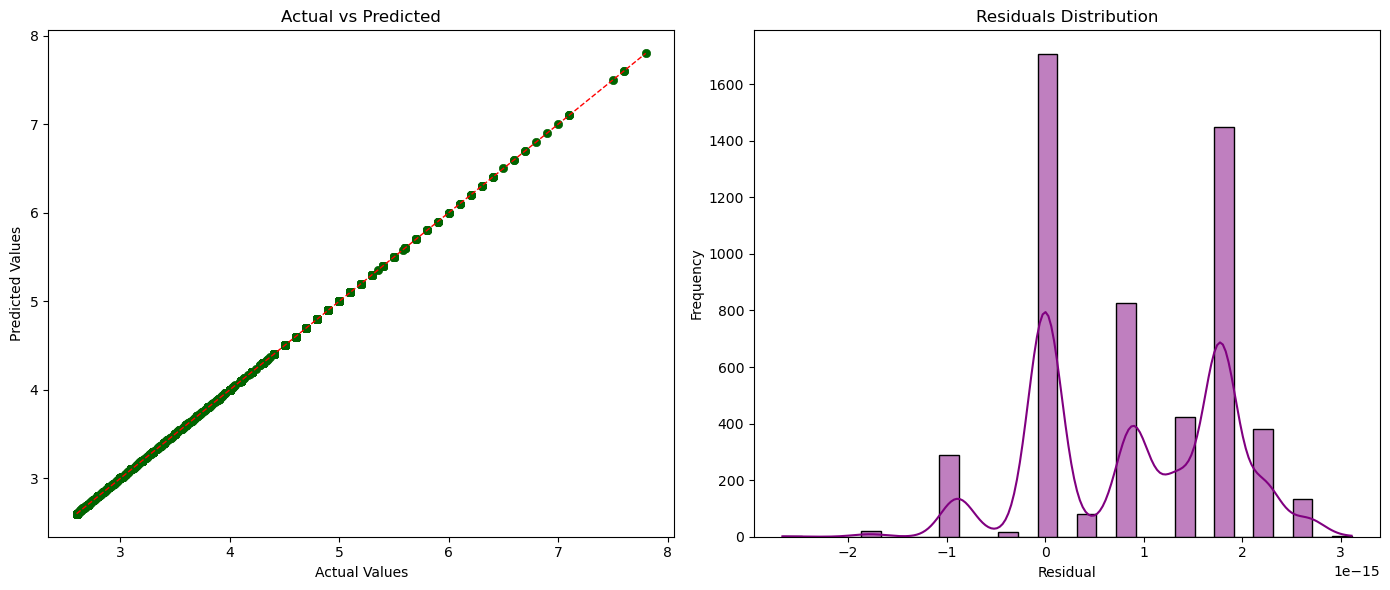

In [77]:
# Simple plots
plt.figure(figsize=(14, 6))

# Actual vs Predicted Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, color='darkgreen', edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
'r--', lw=1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')

# Residuals Plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_lr
sns.histplot(residuals, kde=True, color="purple")
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Polynomial Regression.

In [78]:
# Polynomial Regression
poly = PolynomialFeatures(degree=3)  # Change the degree if needed
poly_features_train = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(poly_features_train, y_train)

# Predict
poly_features_test = poly.transform(X_test)
y_pred_poly = poly_model.predict(poly_features_test)

# Evaluate
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Evaluation:")
print(f"Mean Squared Error: {mse_poly:.4f}")
print(f"Root Mean Squared Error: {rmse_poly:.4f}")
print(f"Mean Absolute Error: {mae_poly:.4f}")
print(f"R^2 Score: {r2_poly:.4f}")
print()

Polynomial Regression Evaluation:
Mean Squared Error: 0.0000
Root Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
R^2 Score: 1.0000



Polynomial Regression plot

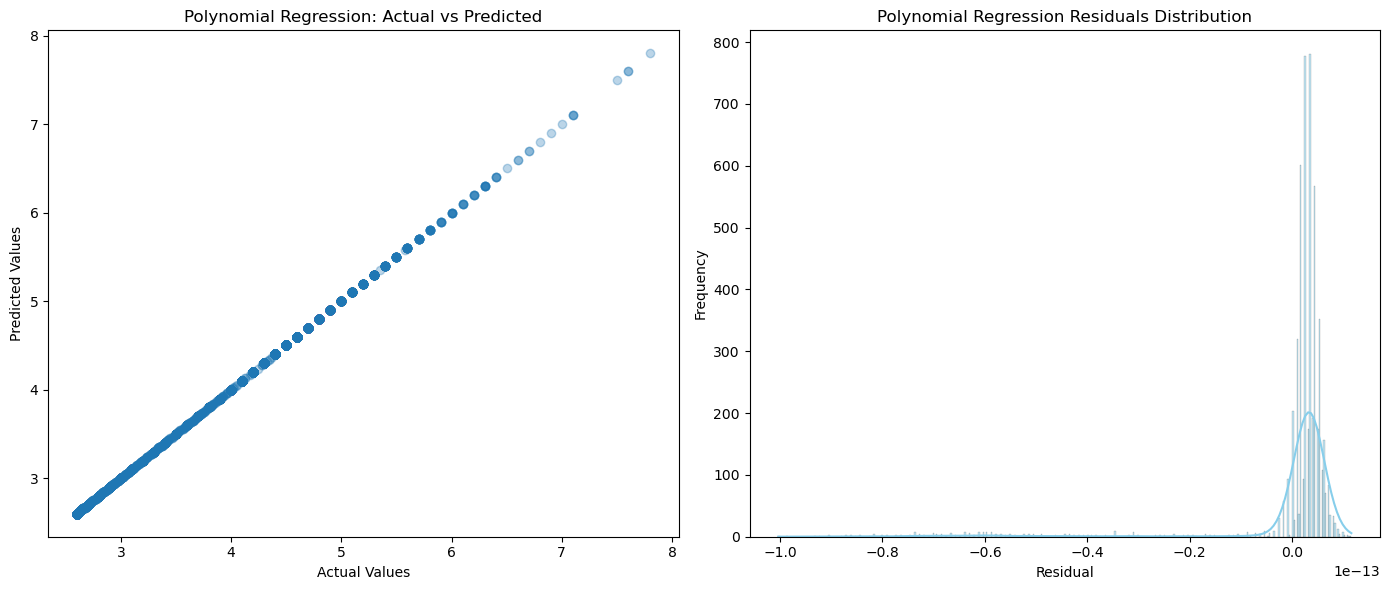

In [79]:
# Simple plots
plt.figure(figsize=(14, 6))

# Actual vs Predicted Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_poly, alpha=0.3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression: Actual vs Predicted')

# Residuals Plot
plt.subplot(1, 2, 2)
residuals_poly = y_test - y_pred_poly
sns.histplot(residuals_poly, kde=True, color="skyblue")
plt.title('Polynomial Regression Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Logistic Regression

In [80]:
y_binary = (y > y.median()).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict
y_pred_log = log_reg.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Logistic Regression Precision: {precision}")
print(f"Logistic Regression Recall: {recall}")
print(f"Logistic Regression F1 Score: {f1}")

Logistic Regression Accuracy: 0.9997497810584262
Logistic Regression Precision: 1.0
Logistic Regression Recall: 0.9994290608050242
Logistic Regression F1 Score: 0.9997144488863506


### Random Forest Regressor model

In [81]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=600, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"Root Mean Squared Error: {rmse_rf:.4f}")
print(f"Mean Absolute Error: {mae_rf:.4f}")
print(f"R^2 Score: {r2_rf:.4f}")
print()

Random Forest Regressor Evaluation:
Mean Squared Error: 0.0000
Root Mean Squared Error: 0.0002
Mean Absolute Error: 0.0000
R^2 Score: 1.0000



Summary of evaluation

In [84]:
# Create a DataFrame to display the evaluation metrics
evaluation_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Random Forest Regressor'],
    'Mean Squared Error': [mse_lr, mse_poly, mse_rf],
    'Root Mean Squared Error': [rmse_lr, rmse_poly, rmse_rf],
    'Mean Absolute Error': [mae_lr, mae_poly, mae_rf],
    'R^2 Score': [r2_lr, r2_poly, r2_rf]
})

# Print the evaluation table
evaluation_results

,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R^2 Score
0,Linear Regression,1.717982e-30,1.310718e-15,1.017680e-15,1.0
1,Polynomial Regression,1.676282e-28,1.294713e-14,5.751659e-15,1.0
2,Random Forest Regressor,4.448337e-08,2.109108e-04,3.336253e-06,1.0
